In [1027]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [905]:
data = pd.read_csv(r'UserLeads.csv')

In [906]:
User_lead = data

In [907]:
User_lead.head()

,lead_id,name,email,user_id,date_of_birth,experience,functional_area,year_passing,10th_year,12th_year,...,ip,from_page,location_on_page,country,location_from_ip,single_course_id,lead_type,updated_on,country_code,sa_lead_id
0,80294728,Deva Arun,devatazmin@gmail.com,18889386,NaN,NaN,NaN,NaN,NaN,NaN,...,103.85.206.46,course_single_page_overview,NaN,0.0,0,5721.0,6,01-03-22 8:17,91,NaN
1,80297741,Naveed Shafi,naddunaveed1419@gmail.com,21165034,NaN,NaN,NaN,NaN,NaN,NaN,...,205.253.26.160,course_single_page_overview,NaN,0.0,0,5721.0,6,01-03-22 10:26,91,NaN
2,80298246,Sneha s,Jessieselvakumar26@gmail.com,17815776,NaN,NaN,NaN,NaN,NaN,NaN,...,223.228.189.170,course_single_page_career_options_and_jobs,NaN,0.0,0,5721.0,6,01-03-22 10:43,91,NaN
3,80299448,Anjali Nair,anjalinairaps@gmail.com,21094808,NaN,NaN,NaN,NaN,NaN,NaN,...,110.225.92.35,listing,NaN,0.0,0,NaN,0,01-03-22 11:15,91,NaN
4,80299870,Shreyash Pratap,kps.hjp03@gmail.com,19850108,NaN,NaN,NaN,NaN,NaN,NaN,...,157.35.17.117,course_single_page_overview,NaN,0.0,0,5718.0,6,01-03-22 11:27,91,NaN


In [908]:
User_lead.shape

(2057, 51)

In [909]:
User_lead.columns

Index(['lead_id', 'name', 'email', 'user_id', 'date_of_birth', 'experience',
       'functional_area', 'year_passing', '10th_year', '12th_year',
       '10th_perc', '12th_perc', 'organisation', 'specialisation',
       'year_interested_in', 'course_id', 'stream', 'sub_stream', 'action',
       'college_id', 'exam_id', 'course_type', 'level', 'mode', 'state',
       'city', 'city_id', 'location', 'channel', 'campaign', 'source',
       'is_mobile_verified', 'is_deleted', 'deleted_on', 'created_on',
       'stream_id', 'sub_stream_id', 'course_tag', 'referrer', 'study_abroad',
       'loan_assistance', 'ip', 'from_page', 'location_on_page', 'country',
       'location_from_ip', 'single_course_id', 'lead_type', 'updated_on',
       'country_code', 'sa_lead_id'],
      dtype='object')

In [910]:
User_lead.isnull().sum()

lead_id                  0
name                     0
email                    0
user_id                  0
date_of_birth         2057
experience            2057
functional_area       2057
year_passing          2057
10th_year             2057
12th_year             2057
10th_perc             2057
12th_perc             2057
organisation          2057
specialisation        2057
year_interested_in    2057
course_id                0
stream                  18
sub_stream            2057
action                   0
college_id            1673
exam_id               2057
course_type           2057
level                  106
mode                     0
state                    0
city                     0
city_id                  0
location              2057
channel               2057
campaign              2057
source                   0
is_mobile_verified       0
is_deleted               0
deleted_on            2057
created_on               0
stream_id               18
sub_stream_id         2057
c

In [911]:
# as we can see many columns are completely empty, so we need to drop them

In [912]:
column_dic = dict(User_lead.isnull().sum())

In [913]:
emplty_col = [key for key, value in column_dic.items() if value>1900 ]

In [914]:
emplty_col

['date_of_birth',
 'experience',
 'functional_area',
 'year_passing',
 '10th_year',
 '12th_year',
 '10th_perc',
 '12th_perc',
 'organisation',
 'specialisation',
 'year_interested_in',
 'sub_stream',
 'exam_id',
 'course_type',
 'location',
 'channel',
 'campaign',
 'deleted_on',
 'sub_stream_id',
 'location_on_page',
 'sa_lead_id']

In [915]:
len(emplty_col)

21

In [916]:
new_data = User_lead.drop(columns=emplty_col)

In [917]:
new_data

,lead_id,name,email,user_id,course_id,stream,action,college_id,level,mode,...,study_abroad,loan_assistance,ip,from_page,country,location_from_ip,single_course_id,lead_type,updated_on,country_code
0,80294728,Deva Arun,devatazmin@gmail.com,18889386,18,Engineering,Revisit,NaN,Graduation,Full Time,...,0,0,103.85.206.46,course_single_page_overview,0.0,0,5721.0,6,01-03-22 8:17,91
1,80297741,Naveed Shafi,naddunaveed1419@gmail.com,21165034,6,Science,Revisit,NaN,Graduation,Full Time,...,0,0,205.253.26.160,course_single_page_overview,0.0,0,5721.0,6,01-03-22 10:26,91
2,80298246,Sneha s,Jessieselvakumar26@gmail.com,17815776,18,Engineering,Revisit,NaN,Graduation,Full Time,...,0,0,223.228.189.170,course_single_page_career_options_and_jobs,0.0,0,5721.0,6,01-03-22 10:43,91
3,80299448,Anjali Nair,anjalinairaps@gmail.com,21094808,195,Aviation,auto_popup,NaN,Graduation,Full Time,...,0,0,110.225.92.35,listing,0.0,0,NaN,0,01-03-22 11:15,91
4,80299870,Shreyash Pratap,kps.hjp03@gmail.com,19850108,15,Management,Revisit,NaN,Graduation,Full Time,...,0,0,157.35.17.117,course_single_page_overview,0.0,0,5718.0,6,01-03-22 11:27,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,82895278,Srikant Rana,shrikantrana7@gmail.com,21579626,120,Management,Revisit,NaN,Post Graduation,Full Time,...,0,0,106.193.135.232,listing,0.0,0,NaN,6,30/04/22 16:10,91
2053,82896006,Yogesh Jaiswal,yjaiswal3@gmail.com,16746904,195,Aviation,Revisit,NaN,Graduation,Full Time,...,0,0,103.54.145.133,listing,0.0,0,NaN,6,30/04/22 16:30,91
2054,82899678,Sujal chowdhury,sujalchowdhury72@gmail.com,21262817,18,Engineering,Revisit,NaN,Graduation,Full Time,...,0,0,110.224.21.46,stream_article_page,0.0,0,NaN,6,30/04/22 18:09,91
2055,82904093,Jessica Dhanak,reginaprincess504@gmail.com,21708054,195,Aviation,Revisit,NaN,Graduation,Full Time,...,0,0,106.222.75.208,listing,0.0,0,NaN,6,30/04/22 20:06,91


In [918]:
new_data.drop(columns=['email', 'college_id', 'lead_id', 'user_id', 'city', 'name', 'state', 'ip'], inplace=True)

In [919]:
new_data.head()

,course_id,stream,action,level,mode,city_id,source,is_mobile_verified,is_deleted,created_on,...,referrer,study_abroad,loan_assistance,from_page,country,location_from_ip,single_course_id,lead_type,updated_on,country_code
0,18,Engineering,Revisit,Graduation,Full Time,253,Mobile Web,0,0,01-03-22 8:17,...,https://collegedunia.com/courses/bachelor-of-s...,0,0,course_single_page_overview,0.0,0,5721.0,6,01-03-22 8:17,91
1,6,Science,Revisit,Graduation,Full Time,200,Mobile Web,0,0,01-03-22 10:26,...,https://collegedunia.com/courses/bachelor-of-s...,0,0,course_single_page_overview,0.0,0,5721.0,6,01-03-22 10:26,91
2,18,Engineering,Revisit,Graduation,Full Time,471,Mobile Web,0,0,01-03-22 10:43,...,https://collegedunia.com/courses/bachelor-of-s...,0,0,course_single_page_career_options_and_jobs,0.0,0,5721.0,6,01-03-22 10:43,91
3,195,Aviation,auto_popup,Graduation,Full Time,125,Desktop,0,0,01-03-22 11:15,...,https://collegedunia.com/bba-aviation/pune-col...,0,0,listing,0.0,0,NaN,0,01-03-22 11:15,91
4,15,Management,Revisit,Graduation,Full Time,95,Desktop,0,0,01-03-22 11:27,...,https://collegedunia.com/courses/bachelor-of-b...,0,0,course_single_page_overview,0.0,0,5718.0,6,01-03-22 11:27,91


In [920]:
(new_data['loan_assistance']==0).all()

True

In [921]:
#check for all zero value
# (new_data['location_from_ip']==0).all()

def get_column_with_all_zero_value(data_frame=new_data):
    column_with_all_zero_value = []
    col = data_frame.columns
    for i in col:
        
        if (data_frame[i]==0).all():
            column_with_all_zero_value.append(i)
        else:
            pass
    return column_with_all_zero_value       
    

In [922]:
column_with_all_zero_value = get_column_with_all_zero_value(new_data)

In [923]:
column_with_all_zero_value

['is_mobile_verified',
 'is_deleted',
 'study_abroad',
 'loan_assistance',
 'location_from_ip']

In [924]:
# column_with_all_zero_value has no importance we will drop it
new_data.drop(columns=column_with_all_zero_value, inplace=True)

In [925]:
new_data.columns

Index(['course_id', 'stream', 'action', 'level', 'mode', 'city_id', 'source',
       'created_on', 'stream_id', 'course_tag', 'referrer', 'from_page',
       'country', 'single_course_id', 'lead_type', 'updated_on',
       'country_code'],
      dtype='object')

In [926]:
catigorical_data_col = new_data.columns[new_data.dtypes=='object']

In [927]:
catigorical_data_col

Index(['stream', 'action', 'level', 'mode', 'source', 'created_on',
       'course_tag', 'referrer', 'from_page', 'updated_on'],
      dtype='object')

In [928]:
new_data['stream'].unique()

array(['Engineering', 'Science', 'Aviation', 'Management', 'Arts',
       'Commerce', 'Paramedical', 'Medical', 'Computer Applications',
       'Pharmacy', 'Design', 'Hotel Management', nan, 'Agriculture',
       'Mass Communications', 'Law', 'Dental', 'Veterinary Sciences',
       'Education', 'Architecture'], dtype=object)

In [929]:
# for i in catigorical_data_col:
#     print(new_data[i].unique())

In [930]:
new_data.isnull().sum()

course_id              0
stream                18
action                 0
level                106
mode                   0
city_id                0
source                 0
created_on             0
stream_id             18
course_tag            57
referrer               0
from_page              6
country              272
single_course_id    1262
lead_type              0
updated_on             0
country_code           0
dtype: int64

In [931]:
new_data['stream'].unique()

array(['Engineering', 'Science', 'Aviation', 'Management', 'Arts',
       'Commerce', 'Paramedical', 'Medical', 'Computer Applications',
       'Pharmacy', 'Design', 'Hotel Management', nan, 'Agriculture',
       'Mass Communications', 'Law', 'Dental', 'Veterinary Sciences',
       'Education', 'Architecture'], dtype=object)

In [932]:
new_data[new_data['stream'].isnull()]['stream_id']

73     NaN
174    NaN
467    NaN
595    NaN
702    NaN
994    NaN
1156   NaN
1305   NaN
1315   NaN
1356   NaN
1606   NaN
1614   NaN
1739   NaN
1757   NaN
1828   NaN
1920   NaN
1926   NaN
1936   NaN
Name: stream_id, dtype: float64

In [933]:
new_data[new_data['stream_id'].isnull()]['stream']

73      NaN
174     NaN
467     NaN
595     NaN
702     NaN
994     NaN
1156    NaN
1305    NaN
1315    NaN
1356    NaN
1606    NaN
1614    NaN
1739    NaN
1757    NaN
1828    NaN
1920    NaN
1926    NaN
1936    NaN
Name: stream, dtype: object

In [934]:
# we have observed that stream and stream_id column are corelated and, and both have 18 missing value in same index,
# we decided that we fill null value in 'stream' column with mode, as it is categorical data.

In [935]:

new_data['stream'] = new_data['stream'].fillna(new_data['stream'].mode()[0])

In [936]:
new_data['stream'].mode()[0]

'Aviation'

In [937]:
new_data['stream'].isnull().sum()

0

In [938]:
# now we convert stream column from catigorical to int with help of stream_id colum and drop stream_id coulmn

In [939]:
lst = []
for i in new_data[['stream', 'stream_id']].value_counts().index:
    lst.append(i)

dict_from_steam_stream_id = {}
for i in range(len(dd)):
    dict_from_steam_stream_id.update({lst[i][0]: lst[i][1]})

In [940]:
dict_from_steam_stream_id

{'Aviation': 4.0,
 'Management': 13.0,
 'Science': 18.0,
 'Engineering': 10.0,
 'Arts': 3.0,
 'Computer Applications': 6.0,
 'Commerce': 5.0,
 'Medical': 15.0,
 'Hotel Management': 11.0,
 'Pharmacy': 17.0,
 'Paramedical': 16.0,
 'Law': 12.0,
 'Education': 9.0,
 'Agriculture': 1.0,
 'Design': 8.0,
 'Dental': 7.0,
 'Mass Communications': 14.0,
 'Architecture': 2.0,
 'Veterinary Sciences': 19.0}

In [941]:
# now we are mapping it to stream column

In [942]:
new_data['stream'] = new_data['stream'].map(dict_from_steam_stream_id)

In [943]:
new_data[['stream', 'stream_id']]

,stream,stream_id
0,10.0,10.0
1,18.0,18.0
2,10.0,10.0
3,4.0,4.0
4,13.0,13.0
...,...,...
2052,13.0,13.0
2053,4.0,4.0
2054,10.0,10.0
2055,4.0,4.0


In [944]:
# droping the stream_id

In [945]:
new_data.drop(columns=['stream_id'], inplace=True)

In [946]:
new_data['level'].value_counts()

Graduation         1727
Post Graduation     224
Name: level, dtype: int64

In [947]:
# new_data['level'] = new_data['level'].fillna(new_data['level'].mode()[0])

In [948]:
new_data['level'].value_counts()

Graduation         1727
Post Graduation     224
Name: level, dtype: int64

In [949]:
new_data[['course_tag', 'level']]

,course_tag,level
0,BE/B.Tech,Graduation
1,B.Sc,Graduation
2,BE/B.Tech,Graduation
3,BBA (Aviation),Graduation
4,BBA/BBM,Graduation
...,...,...
2052,MBA/PGDM,Post Graduation
2053,BBA (Aviation),Graduation
2054,BE/B.Tech,Graduation
2055,BBA (Aviation),Graduation


In [950]:
##It observed that course_tag and level is corellated

In [951]:
#so we are filling level null value with help of course_tag column

In [952]:
new_data['level'].isnull()[98]

True

In [953]:
new_data['course_tag'].isnull()[98]

False

In [954]:
new_data['course_tag'].isnull()[98]

False

In [955]:
i=10
new_data.loc[i,'course_tag']

'BE/B.Tech'

In [956]:
for i in new_data.index:
    if new_data['level'].isnull()[i]:
        if not(new_data['course_tag'].isnull()[i]):
            
            new_data.loc[i,'level'] = new_data.loc[i,'course_tag'][:8]
            
    else:
        
        pass
    
    


In [957]:
# for i in ll.index:
#     if type(ll.loc[i]['course_tag'])!=str:
#         pass
#     else:
        
#         ll['level'].loc[i] = ll.loc[i]['course_tag'][:8]
    
    


In [958]:
new_data.isnull().sum()

course_id              0
stream                 0
action                 0
level                 57
mode                   0
city_id                0
source                 0
created_on             0
course_tag            57
referrer               0
from_page              6
country              272
single_course_id    1262
lead_type              0
updated_on             0
country_code           0
dtype: int64

In [959]:
## Now we map these value of level column as below
new_data['level'] = new_data['level'].map({'Graduate': 'Graduation', 'Certific': 'Diploma', 'UG Certi': 'Graduation', 'Diploma ': 'Diploma', 'M.Phil/P': 'Post Graduation',
       'UG Diplo': 'Diploma', 'PG Diplo':'Post Graduation', 'Post Graduation': 'Post Graduation', 'Graduation': 'Graduation'})

In [960]:
new_data['level'].value_counts()

Graduation         1751
Post Graduation     240
Diploma               8
Name: level, dtype: int64

In [961]:
new_data.isnull().sum()

course_id              0
stream                 0
action                 0
level                 58
mode                   0
city_id                0
source                 0
created_on             0
course_tag            57
referrer               0
from_page              6
country              272
single_course_id    1262
lead_type              0
updated_on             0
country_code           0
dtype: int64

In [962]:
# Now level column have only 58 missing value, these value filled by mode

In [963]:
new_data['level'] = new_data['level'].fillna(new_data['level'].mode()[0])

In [964]:
new_data.isnull().sum()

course_id              0
stream                 0
action                 0
level                  0
mode                   0
city_id                0
source                 0
created_on             0
course_tag            57
referrer               0
from_page              6
country              272
single_course_id    1262
lead_type              0
updated_on             0
country_code           0
dtype: int64

In [965]:
new_data['level'].value_counts()

Graduation         1809
Post Graduation     240
Diploma               8
Name: level, dtype: int64

In [966]:
# course_tag and level correlated so we are droping the course_tag column

In [967]:
new_data.drop(columns=['course_tag'], inplace=True)

In [968]:
(new_data['country']==0).all()

False

In [969]:
# as country coulumn have 1785 zeros and 272 NaN value so we can say there is no information provided by this column, we are droping it

In [970]:
new_data['country'].value_counts()

0.0    1785
Name: country, dtype: int64

In [971]:
1785 + 272

2057

In [972]:
new_data.drop(columns=['country'], inplace=True)

In [973]:
new_data.isnull().sum()

course_id              0
stream                 0
action                 0
level                  0
mode                   0
city_id                0
source                 0
created_on             0
referrer               0
from_page              6
single_course_id    1262
lead_type              0
updated_on             0
country_code           0
dtype: int64

In [974]:
new_data['single_course_id'].value_counts()

5718.0    299
5721.0    214
1328.0    117
5740.0     90
5742.0     48
5724.0     25
5779.0      1
1392.0      1
Name: single_course_id, dtype: int64

In [975]:
new_data['single_course_id']

0       5721.0
1       5721.0
2       5721.0
3          NaN
4       5718.0
         ...  
2052       NaN
2053       NaN
2054       NaN
2055       NaN
2056    5718.0
Name: single_course_id, Length: 2057, dtype: float64

In [976]:
# as single_course_id is categorical feature so we are using mode to replace NaN

In [977]:
new_data['single_course_id'] = new_data['single_course_id'].fillna(new_data['single_course_id'].mode()[0])

In [978]:
new_data['single_course_id'].isnull().sum()

0

In [979]:
new_data.isnull().sum()

course_id           0
stream              0
action              0
level               0
mode                0
city_id             0
source              0
created_on          0
referrer            0
from_page           6
single_course_id    0
lead_type           0
updated_on          0
country_code        0
dtype: int64

In [980]:
new_data['from_page'].value_counts()

course_single_page_overview                           813
listing                                               764
stream_article_page                                   204
stream_single_page_overview                            97
course_single_page_career_options_and_jobs             44
course_single_page_syllabus                            27
Mail                                                   26
stream_single_page_aviation_jobs_in_india              17
stream_single_page_aviation_courses_in_kerala          10
course_single_page_how_to_be_a_air_cabin_crew           8
stream_single_page_aviation_courses_after_12th          6
homepage                                                5
course_single_page_distance_education                   5
exams_news                                              3
stream_page                                             2
college_reviews_page                                    2
college_courses_fees_page                               2
college_home_p

In [981]:
## filling null value with mode
new_data['from_page'] = new_data['from_page'].fillna(new_data['from_page'].mode()[0])

In [982]:
# using sklearn preprocessing lib to encode catigorical data

In [983]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
new_data['from_page']= label_encoder.fit_transform(new_data['from_page'])
  
new_data['from_page'].unique()

array([13,  7, 18, 26,  5, 19,  0, 22, 24, 14, 16,  9,  6,  1, 15, 21, 17,
       11, 20, 23,  3,  8, 25,  4,  2, 10, 12])

In [984]:
new_data['from_page'].isnull().sum()

0

In [985]:
new_data.isnull().sum()

course_id           0
stream              0
action              0
level               0
mode                0
city_id             0
source              0
created_on          0
referrer            0
from_page           0
single_course_id    0
lead_type           0
updated_on          0
country_code        0
dtype: int64

In [986]:
new_data['country_code'].nunique()

1

In [987]:
new_data['country_code'].value_counts()

91    2057
Name: country_code, dtype: int64

In [988]:
new_data.columns

Index(['course_id', 'stream', 'action', 'level', 'mode', 'city_id', 'source',
       'created_on', 'referrer', 'from_page', 'single_course_id', 'lead_type',
       'updated_on', 'country_code'],
      dtype='object')

In [989]:
# As alldata in country_code is same, so it has no use

In [990]:
new_data.drop(columns=['country_code', 'referrer', 'updated_on'], inplace=True)

In [991]:
new_data

,course_id,stream,action,level,mode,city_id,source,created_on,from_page,single_course_id,lead_type
0,18,10.0,Revisit,Graduation,Full Time,253,Mobile Web,01-03-22 8:17,13,5721.0,6
1,6,18.0,Revisit,Graduation,Full Time,200,Mobile Web,01-03-22 10:26,13,5721.0,6
2,18,10.0,Revisit,Graduation,Full Time,471,Mobile Web,01-03-22 10:43,7,5721.0,6
3,195,4.0,auto_popup,Graduation,Full Time,125,Desktop,01-03-22 11:15,18,5718.0,0
4,15,13.0,Revisit,Graduation,Full Time,95,Desktop,01-03-22 11:27,13,5718.0,6
...,...,...,...,...,...,...,...,...,...,...,...
2052,120,13.0,Revisit,Post Graduation,Full Time,336,Mobile Web,30/04/22 16:10,18,5718.0,6
2053,195,4.0,Revisit,Graduation,Full Time,125,Mobile Web,30/04/22 16:30,18,5718.0,6
2054,18,10.0,Revisit,Graduation,Full Time,608,Mobile Web,30/04/22 18:09,19,5718.0,6
2055,195,4.0,Revisit,Graduation,Full Time,150,Mobile Web,30/04/22 20:06,18,5718.0,6


In [992]:
new_data['action'].unique()

array(['Revisit', 'auto_popup', 'Apply', 'Brochure', 'info',
       'eligibility', 'AskQuestion', 'Apply Default', 'cutoff'],
      dtype=object)

In [993]:
# encoding catigorical variable

In [994]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
new_data['action']= label_encoder.fit_transform(new_data['action'])
  
new_data['action'].unique()

array([4, 5, 0, 3, 8, 7, 2, 1, 6])

In [995]:
new_data['mode'].unique()

array(['Full Time', 'Distance'], dtype=object)

In [996]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
new_data['mode']= label_encoder.fit_transform(new_data['mode'])
  
new_data['mode'].unique()

array([1, 0])

In [997]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
new_data['source']= label_encoder.fit_transform(new_data['source'])
  
new_data['source'].unique()

array([1, 0, 2, 3])

In [998]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
new_data['level']= label_encoder.fit_transform(new_data['level'])
  
new_data['level'].unique()

array([1, 2, 0])

In [999]:
new_data.drop(columns=['created_on'], inplace=True)

In [1000]:
new_data['lead_type'].value_counts()

6    1257
0     735
2      39
4      26
Name: lead_type, dtype: int64

In [1001]:
# I am assuming lead_type is output variable

In [1002]:
y = new_data['lead_type']

In [1003]:
df = new_data.copy()

In [1004]:
df = df.drop(columns=['lead_type'])

In [1005]:
df

,course_id,stream,action,level,mode,city_id,source,from_page,single_course_id
0,18,10.0,4,1,1,253,1,13,5721.0
1,6,18.0,4,1,1,200,1,13,5721.0
2,18,10.0,4,1,1,471,1,7,5721.0
3,195,4.0,5,1,1,125,0,18,5718.0
4,15,13.0,4,1,1,95,0,13,5718.0
...,...,...,...,...,...,...,...,...,...
2052,120,13.0,4,2,1,336,1,18,5718.0
2053,195,4.0,4,1,1,125,1,18,5718.0
2054,18,10.0,4,1,1,608,1,19,5718.0
2055,195,4.0,4,1,1,150,1,18,5718.0


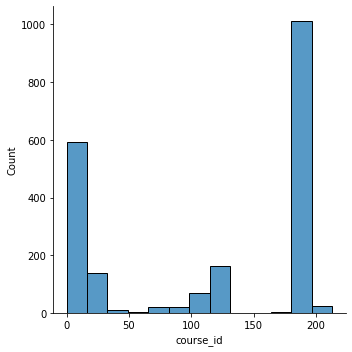

In [1006]:
sns.displot(df['course_id'])

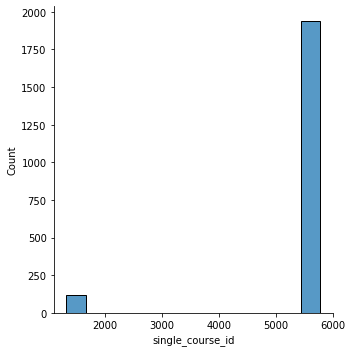

In [1007]:
sns.displot(df['single_course_id'])

In [1008]:
df.columns

Index(['course_id', 'stream', 'action', 'level', 'mode', 'city_id', 'source',
       'from_page', 'single_course_id'],
      dtype='object')

In [1009]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [1010]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=101)

In [1011]:
rf = RandomForestClassifier(n_estimators=400, random_state=101, verbose=4)

In [1012]:
rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.4s finished


RandomForestClassifier(n_estimators=400, random_state=101, verbose=4)

In [1013]:
y_pred = rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


In [1014]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [1015]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           2       1.00      1.00      1.00        10
           4       0.86      1.00      0.92         6
           6       1.00      1.00      1.00       394

    accuracy                           1.00       618
   macro avg       0.96      1.00      0.98       618
weighted avg       1.00      1.00      1.00       618



In [1016]:
print(accuracy_score(y_test, y_pred))

0.9983818770226537


In [1017]:
pd.Series(y_pred).unique()

array([0, 6, 2, 4], dtype=int64)

<Figure size 720x720 with 0 Axes>

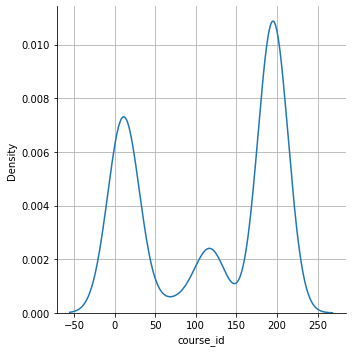

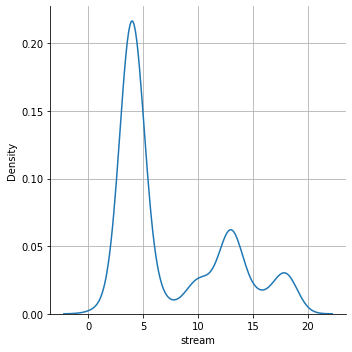

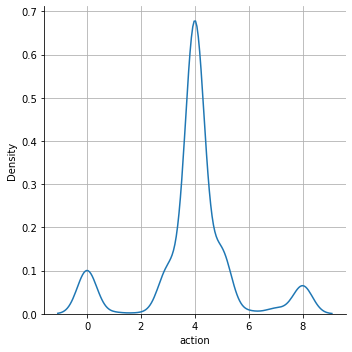

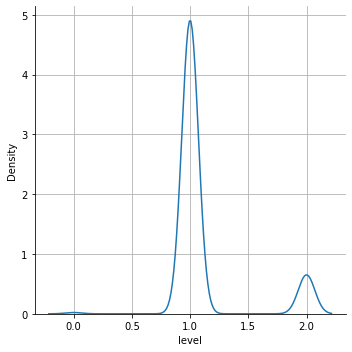

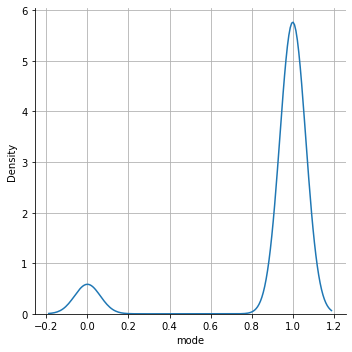

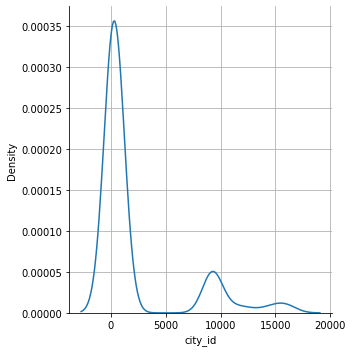

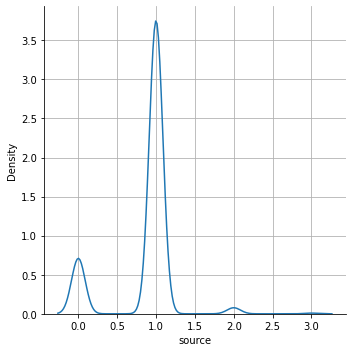

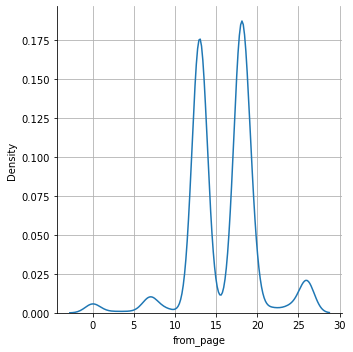

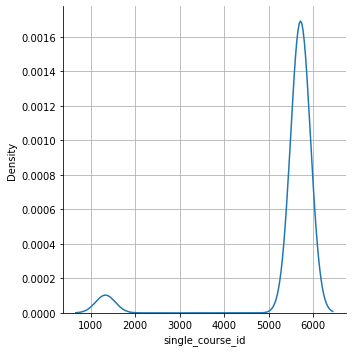

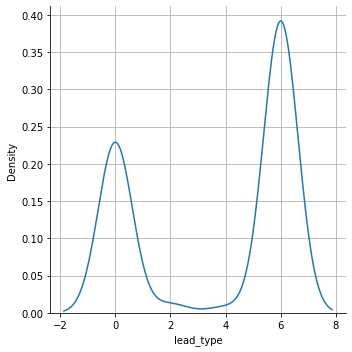

In [1035]:
plt.figure(figsize=(10,10))

for col in new_data.columns:
    sns.displot(new_data[col], kind='kde')
    plt.grid()
    
plt.show()